In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
base_dir = '/tmp'
zip_ref = zipfile.ZipFile("/content/drive/My Drive/lung_colon_image_set.zip", 'r')
zip_ref.extractall(base_dir)
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = base_dir + '/lung_colon_image_set/colon_image_sets/'
datagen_colon = ImageDataGenerator(validation_split = 0.2, 
        rescale=1 / 255.0, # RGB coefficients in the 0-255, it would be too high for our model to process, so we target values between 0 and 1 instead by scaling with a 1/255
        rotation_range=0.0, # Random Rotations
        zoom_range=0.0, # Random Zoom
        width_shift_range=0.0, # Random Shifts
        height_shift_range=0.0, # Random Shifts
        shear_range=0.0,
        horizontal_flip=False) # Random Flips

BATCH_SIZE = 32

X = Y = 128

training = datagen_colon.flow_from_directory(data_dir,
                                    class_mode = "binary", # 2D categorical, 1D binary
                                    target_size = (X, Y),
                                    color_mode="rgb",
                                    batch_size = BATCH_SIZE, # Size of the batches of data.
                                    shuffle = True,
                                    subset='training',
                                    seed = 42) # Set to reproduce the result.

validation = datagen_colon.flow_from_directory(data_dir,
                                      class_mode = "binary",
                                      target_size = (X, Y),
                                      color_mode="rgb",
                                      batch_size = BATCH_SIZE, 
                                      shuffle = True,
                                      subset='validation',
                                      seed = 42)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


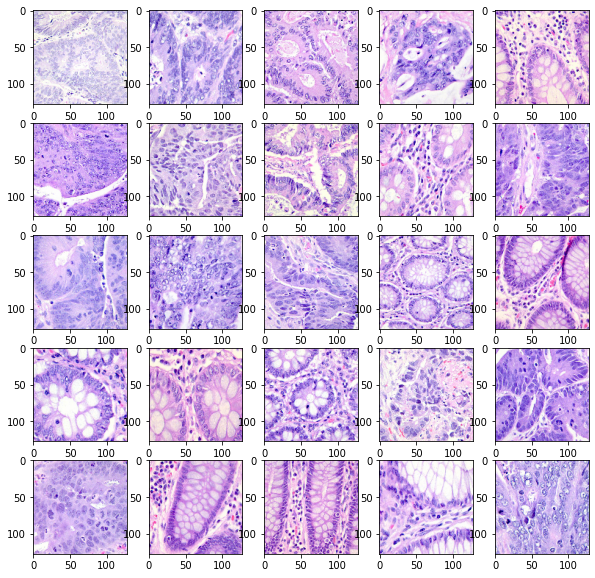

In [ ]:
plt.gcf().set_size_inches(10, 10)
for x_batch, y_batch in training: # print image
    for i in range(0, 25):
        plt.subplot(5, 5, i+1)
        plt.imshow(x_batch[i].reshape(X, Y, 3))
    break

In [ ]:
input_shape = training.image_shape
num_classes = training.num_classes
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding = 'Same'))
model.add(Conv2D(32, kernel_size=(3, 3),  activation ='relu', padding = 'Same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer='rmsprop', metrics=['binary_accuracy'])
#model.compile(loss = "binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)        36928     
                                                      

In [ ]:
epochs = 20
history = model.fit(training, 
                    epochs=epochs,  # one forward/backward pass of training data
                    validation_data=validation)

Epoch 1/20
250/250 [==============================] - 101s 401ms/step - loss: 0.7583 - binary_accuracy: 0.5075 - val_loss: 0.6891 - val_binary_accuracy: 0.5000
Epoch 2/20
250/250 [==============================] - 101s 403ms/step - loss: 0.6984 - binary_accuracy: 0.5527 - val_loss: 0.6503 - val_binary_accuracy: 0.7795
Epoch 3/20
250/250 [==============================] - 99s 397ms/step - loss: 0.5784 - binary_accuracy: 0.6984 - val_loss: 0.4597 - val_binary_accuracy: 0.7355
Epoch 4/20
250/250 [==============================] - 100s 398ms/step - loss: 0.4527 - binary_accuracy: 0.7995 - val_loss: 0.4597 - val_binary_accuracy: 0.7960
Epoch 5/20
250/250 [==============================] - 100s 401ms/step - loss: 0.3904 - binary_accuracy: 0.8372 - val_loss: 0.2290 - val_binary_accuracy: 0.9110
Epoch 6/20
250/250 [==============================] - 100s 400ms/step - loss: 0.2950 - binary_accuracy: 0.8777 - val_loss: 0.1284 - val_binary_accuracy: 0.9505
Epoch 7/20
250/250 [=====================

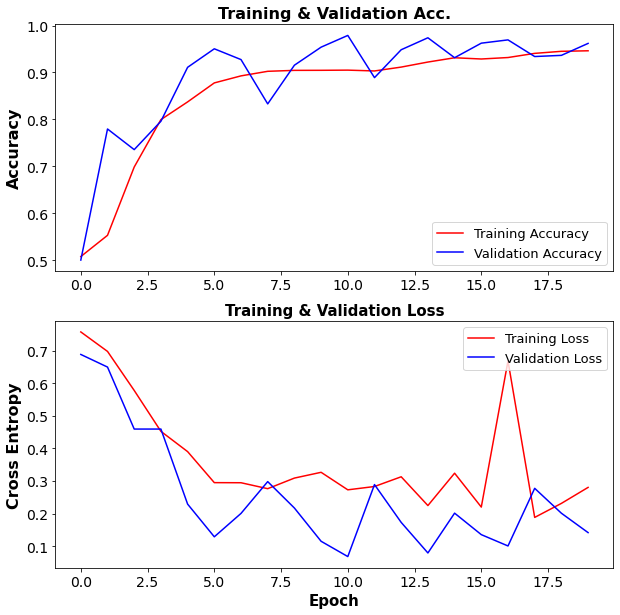

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Training & Validation Acc.', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(validation)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

63/63 [==============================] - 22s 350ms/step - loss: 0.1413 - binary_accuracy: 0.9620
Test loss: 0.14130799472332 Test Acc: 0.9620000123977661


Found 2000 images belonging to 2 classes.


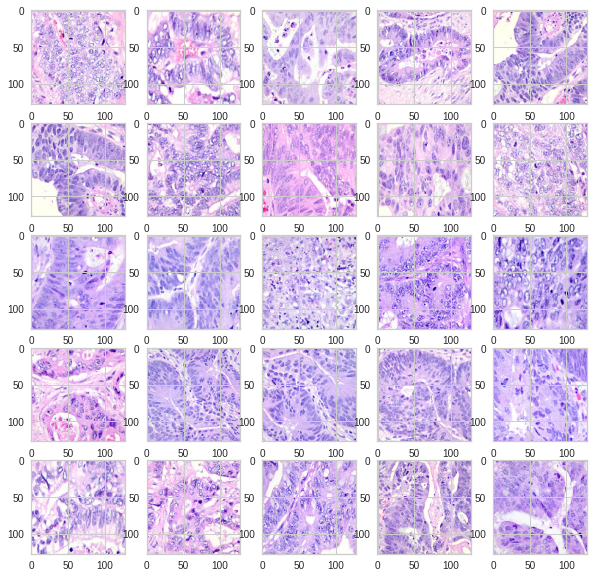

In [ ]:
from sklearn.metrics import classification_report

v1 = datagen_colon.flow_from_directory(data_dir,
                                      class_mode = "binary",
                                      target_size = (X, Y),
                                      color_mode="rgb",
                                      batch_size = BATCH_SIZE, 
                                      shuffle = False,
                                      subset='validation',
                                      seed = 42)
# the shuffle parameter is True by default, 
# because of which the predictions didn't correspond to the ground truth.
# Setting shuffle=False solved the problem.
plt.gcf().set_size_inches(10, 10)
for x_batch, y_batch in v1: # print image
    for i in range(0, 25):
        plt.subplot(5, 5, i+1)
        plt.imshow(x_batch[i].reshape(X, Y, 3))
    break

In [ ]:
test_loss, test_acc = model.evaluate(v1)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

63/63 [==============================] - 18s 283ms/step - loss: 0.1413 - binary_accuracy: 0.9620
Test loss: 0.14130796492099762 Test Acc: 0.9620000123977661


binary class mode classification.

argmax would be returning the index position of the result but as you are using binary classes and in your final layer you have 1 dense. It will only return a single value so it will always return the first class (0 as the index position). As the network is only set, to return one class.

There are 2 solutions and it depends which you prefer:

Is to change the class_mode to 'categorical' for the train and test generators, change the final dense layer from 1 to 2 so this will return scores/probabilities for both classes. So when you use argmax, it will return the index position of the top score indicating which class it has predicted.

The other way would be to stick with what you have got but you would have to change how to determine the class. You would use the score so yhat will be a list. You would need to access the score and based on that determine which class the model has predicted. Maybe someone can clarify this as I have not use this method and I am not sure.

In [ ]:
Y_pred = model.predict(v1)

In [ ]:
y_pred = (Y_pred > 0.5).astype("int32") #**** for binary sigmoid
from tensorflow.keras.metrics import Accuracy
m = Accuracy()
m.update_state(v1.classes, y_pred)
print("Accuracy: ",m.result().numpy())

Accuracy:  0.962


In [ ]:
print(classification_report(v1.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1000
           1       0.93      1.00      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

